In [78]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer
from sklearn.tree import DecisionTreeRegressor

In [42]:
data1 = pd.read_csv("train_house.csv")
data2 = pd.read_csv("test_house.csv")

In [43]:
data1.head()
# Top 5 rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [44]:
data1.shape
# (rows,columns)

(1460, 81)

In [45]:
data1.info()
# getting through data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

** data1.get_dtype_counts() --> Data types counts **

In [46]:
data1.describe()
# statistical analysis (Numerical columns)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Making correlation heatmap will not be a good idea !!! <br>
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data1.corr(),annot=True)

In [47]:
corr=data1.corr()["SalePrice"]
corr[np.argsort(corr,axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Correlations are the best way to know the important columns.

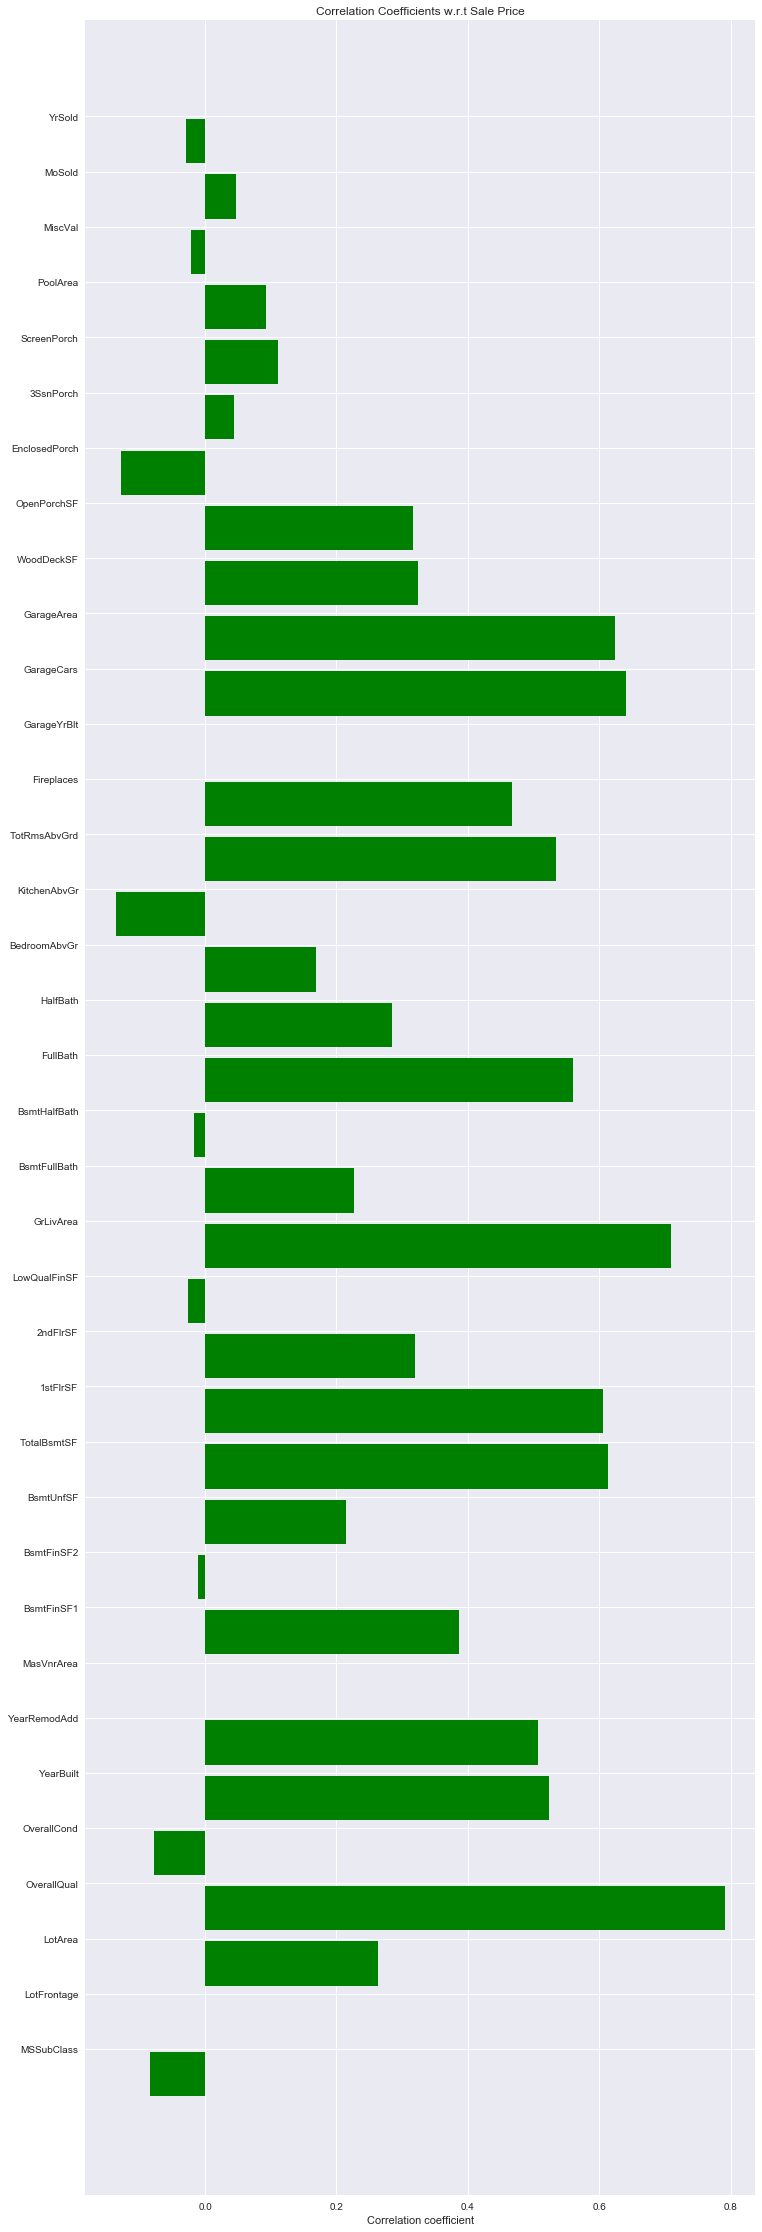

In [48]:
# For lots of columns dataset, and when finding correlations/anything visually

num_feat=data1.columns[data1.dtypes!=object]
num_feat=num_feat[1:-1] 
# first and last column excluded
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(data1[col].values, data1.SalePrice.values)[0,1])
    # np.corrcoef(dataframe[column].values,dataframe.Column.values)[range])
    
ind = np.arange(len(labels))
# Array from 0 to length of list 
width = 0.45
fig, ax = plt.subplots(figsize=(12,40))
# Plot size
ax.barh(ind, np.array(values), color='green')
# Horizontal bar(no.of bars,length of each,color)
ax.set_yticks(ind+((width)))
# green bars from title 
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");

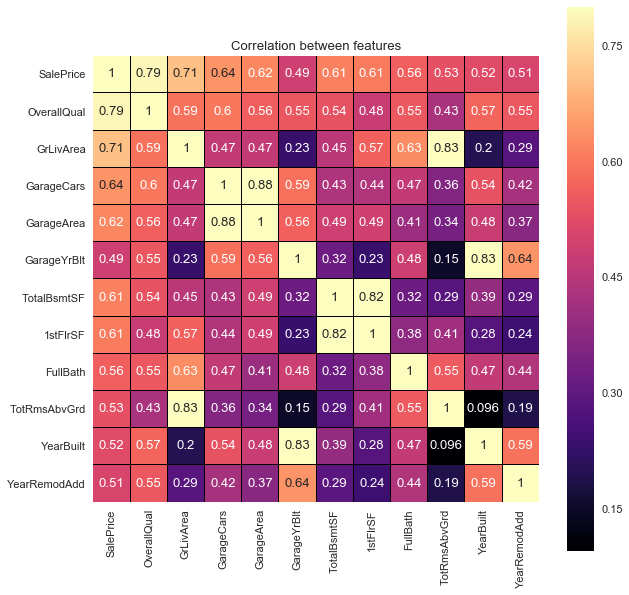

In [49]:
# above 0.5 +ve correlation
corr=data1[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageArea","GarageYrBlt","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='magma',linecolor="black")
# (columns,max range,width of lines,square shape,color mapping,color of line)
plt.title('Correlation between features');

In [50]:
# Categorical Variable compared with Target Variable 

#data1[['OverallQual','SalePrice']]
data1[['OverallQual','SalePrice']].groupby(['OverallQual'],
as_index=False).mean().sort_values(by='OverallQual', ascending=False)

,OverallQual,SalePrice
9,10,438588.388889
8,9,367513.023256
7,8,274735.535714
6,7,207716.423197
5,6,161603.034759
4,5,133523.347607
3,4,108420.655172
2,3,87473.750000
1,2,51770.333333
0,1,50150.000000


In [51]:
data1[['GarageCars','SalePrice']].groupby(['GarageCars'],
as_index=False).mean().sort_values(by='GarageCars', ascending=False)

,GarageCars,SalePrice
4,4,192655.800000
3,3,309636.121547
2,2,183851.663835
1,1,128116.688347
0,0,103317.283951


In [52]:
data1[['Fireplaces','SalePrice']].groupby(['Fireplaces'],
as_index=False).mean().sort_values(by='Fireplaces', ascending=False)

,Fireplaces,SalePrice
3,3,252000.000000
2,2,240588.539130
1,1,211843.909231
0,0,141331.482609


<font size="3">**Univariate Analysis**</font>

C:\Users\a\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


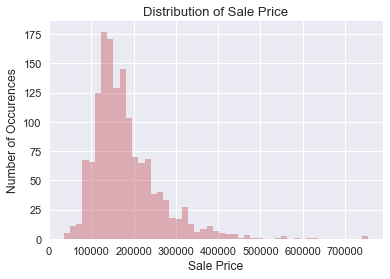

In [53]:
# Checking which numbers are frequently occuring in a column

sns.distplot(data1['SalePrice'], color="r", kde=False)
# sns.distplot(column, color, curve)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price");

In [54]:
data1['SalePrice'].skew()

1.8828757597682129

Positive Skewness means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode

In [55]:
data1['SalePrice'].kurt()

6.536281860064529

Positive kurtosis. A distribution with a positive kurtosis value indicates that the distribution has heavier tails than the normal distribution. For example, data that follow a t distribution have a positive kurtosis value

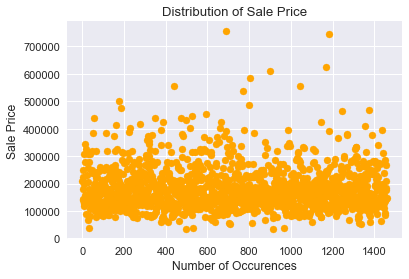

In [56]:
#upperlimit = np.percentile(houses.SalePrice.values, 99.5)
#houses['SalePrice'].ix[houses['SalePrice']>upperlimit] = upperlimit
#upperlimit
plt.scatter(range(data1.shape[0]), data1["SalePrice"].values,color='orange')
plt.title("Distribution of Sale Price")
plt.xlabel("Number of Occurences")
plt.ylabel("Sale Price");

C:\Users\a\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


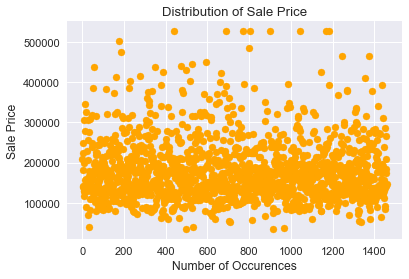

In [57]:
# One Way of dealing with outliers

upperlimit = np.percentile(data1.SalePrice.values, 99.5)
data1['SalePrice'].loc[data1['SalePrice']>upperlimit] = upperlimit
#upperlimit
plt.scatter(range(data1.shape[0]), data1["SalePrice"].values,color='orange')
plt.title("Distribution of Sale Price")
plt.xlabel("Number of Occurences")
plt.ylabel("Sale Price");

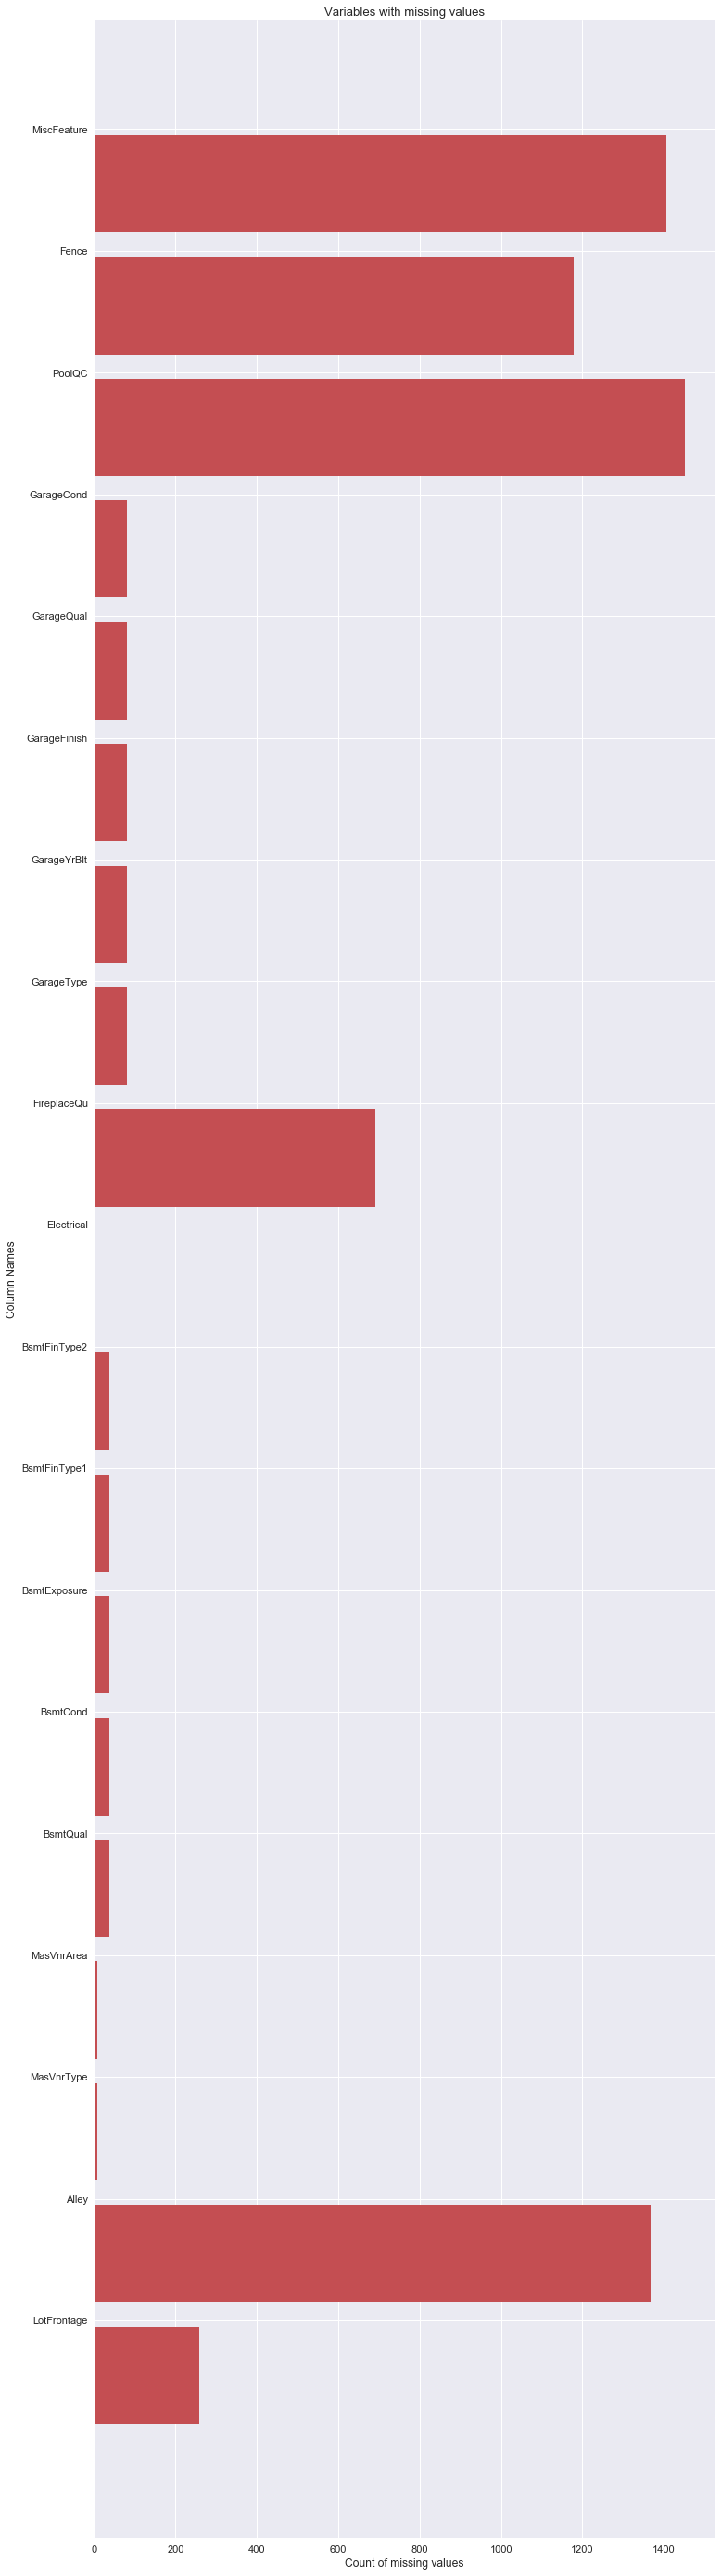

In [58]:
null_columns=data1.columns[data1.isnull().any()]
labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(data1[col].isnull().sum())
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,50))
ax.barh(ind, np.array(values), color='r')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");

In [59]:
# Counting missing values column-wise

missing_column = (data1.isnull().sum())
print(missing_column[missing_column > 0])

#null_columns=houses.columns[houses.isnull().any()]
#houses[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [60]:
# We have to fill na values, thus we can fill it with column values that is highly correlated with this column.
data1['LotFrontage'].corr(data1['LotArea'])

0.42609501877180816

In [61]:
# Take the square root and this increase the correlation
data1['SqrtLotArea']=np.sqrt(data1['LotArea'])
data1['LotFrontage'].corr(data1['SqrtLotArea'])

0.6020022167939364

C:\Users\a\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\a\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


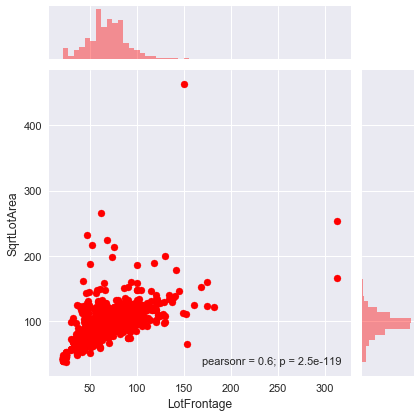

In [62]:
# Draw a plot of two variables with bivariate and univariate graphs
sns.jointplot(data1['LotFrontage'],
              data1['SqrtLotArea'],
              color='red');

In [63]:
filter = data1['LotFrontage'].isnull()
data1.LotFrontage[filter]=data1.SqrtLotArea[filter]

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [64]:
missing_column = (data1.isnull().sum())
print(missing_column[missing_column > 0])

Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Now checking what can be filled in place of missing values of "MasVnrArea" and "MasVnrTyp"

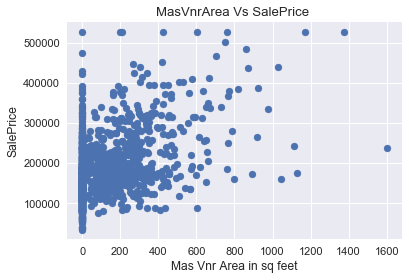

In [65]:
plt.scatter(data1["MasVnrArea"],data1["SalePrice"])
plt.title("MasVnrArea Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Mas Vnr Area in sq feet");

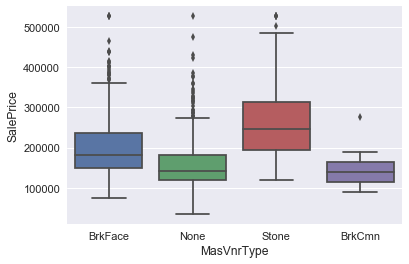

In [66]:
# For categorical variable missing values
sns.boxplot("MasVnrType","SalePrice",data=data1)

In [67]:
data1["MasVnrType"] = data1["MasVnrType"].fillna('None')
data1["MasVnrArea"] = data1["MasVnrArea"].fillna(0.0)

In [68]:
missing_column = (data1.isnull().sum())
print(missing_column[missing_column > 0])

Alley           1369
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Text(0.5,0,'Electrical')

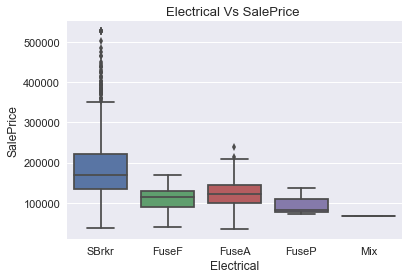

In [69]:
sns.boxplot("Electrical","SalePrice",data=data1)
plt.title("Electrical Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Electrical")

In [70]:
data1["Electrical"] = data1["Electrical"].fillna('SBrkr')

In [71]:
missing_column = (data1.isnull().sum())
print(missing_column[missing_column > 0])

Alley           1369
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


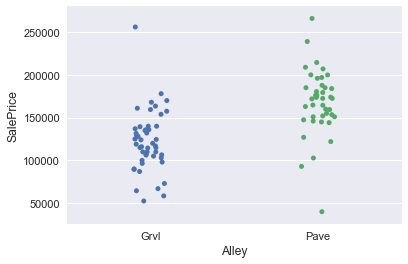

In [72]:
#sns.boxplot("Alley","SalePrice",data=data1)
sns.stripplot(x=data1["Alley"], y=data1["SalePrice"],jitter=True);

In [73]:
data1["Alley"] = data1["Alley"].fillna('None')

In [74]:
missing_column = (data1.isnull().sum())
print(missing_column[missing_column > 0])

BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [75]:
X_train = data1.drop('SalePrice',axis=1)
X_train = X_train.select_dtypes(exclude=['object'])
y_train = data1.SalePrice
X_train = X_train.drop('SqrtLotArea',axis=1)

In [76]:
X_test = data2.select_dtypes(exclude=['object'])

In [79]:
imputed_X_train = X_train.copy()
imputed_X_test = X_test.copy()
# Copying the orginal data,original data should not change(avoid it)
col_missing_val = (col for col in X_train.columns if X_train[col].isnull().any())
# Any column having missing values, it will be put into above variable
for col in col_missing_val:
    imputed_X_train[col +'_was_missing'] = imputed_X_train[col].isnull()
    imputed_X_test[col +'_was_missing'] = imputed_X_test[col].isnull()
#Imputer
my_imputer = Imputer()
imputed_X_train = my_imputer.fit_transform(imputed_X_train)
imputed_X_test = my_imputer.transform(imputed_X_test)

# model1
model = DecisionTreeRegressor()
model.fit(imputed_X_train,y_train)
preds = model.predict(imputed_X_test)
print(preds)

[127000. 164900. 223500. ... 148000.  99900. 271900.]


In [80]:
# model2
model = RandomForestRegressor()
model.fit(imputed_X_train,y_train)
preds = model.predict(imputed_X_test)
print(preds)

[121490. 154680. 174394. ... 156515. 106840. 217350.]


In [ ]:
submission = pd.DataFrame({'Id': data2.Id, 'SalePrice': preds})
# you could use any filename. We choose submission here
submission.to_csv('FirstCompetition.csv', index=False)